In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

In [2]:
dataset = pd.read_csv('Dataset/Classified Data' , index_col = 0)
dataset.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [4]:
dataset.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [5]:
# scaled data - feature scaling is mandatory

In [6]:
dataset['TARGET CLASS'].value_counts()

TARGET CLASS
1    500
0    500
Name: count, dtype: int64

In [7]:
# Balanced data 

In [8]:
#split the data into x and y 
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [9]:
x.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [10]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

In [11]:
# split the data into train and test
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train , y_test = train_test_split(x , y , test_size =0.25 ,random_state = 1 , stratify = y)

# building KNN model

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# select the best K value to decide 'n_neighbours' basis error_rate

In [13]:
error_rate = []

In [14]:
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train , y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred != y_test))

In [15]:
error_rate

[0.096,
 0.08,
 0.06,
 0.052,
 0.056,
 0.048,
 0.052,
 0.048,
 0.06,
 0.048,
 0.048,
 0.048,
 0.06,
 0.052,
 0.056,
 0.052,
 0.06,
 0.056,
 0.064,
 0.056,
 0.052,
 0.044,
 0.052,
 0.052,
 0.052,
 0.048,
 0.048,
 0.048,
 0.044]

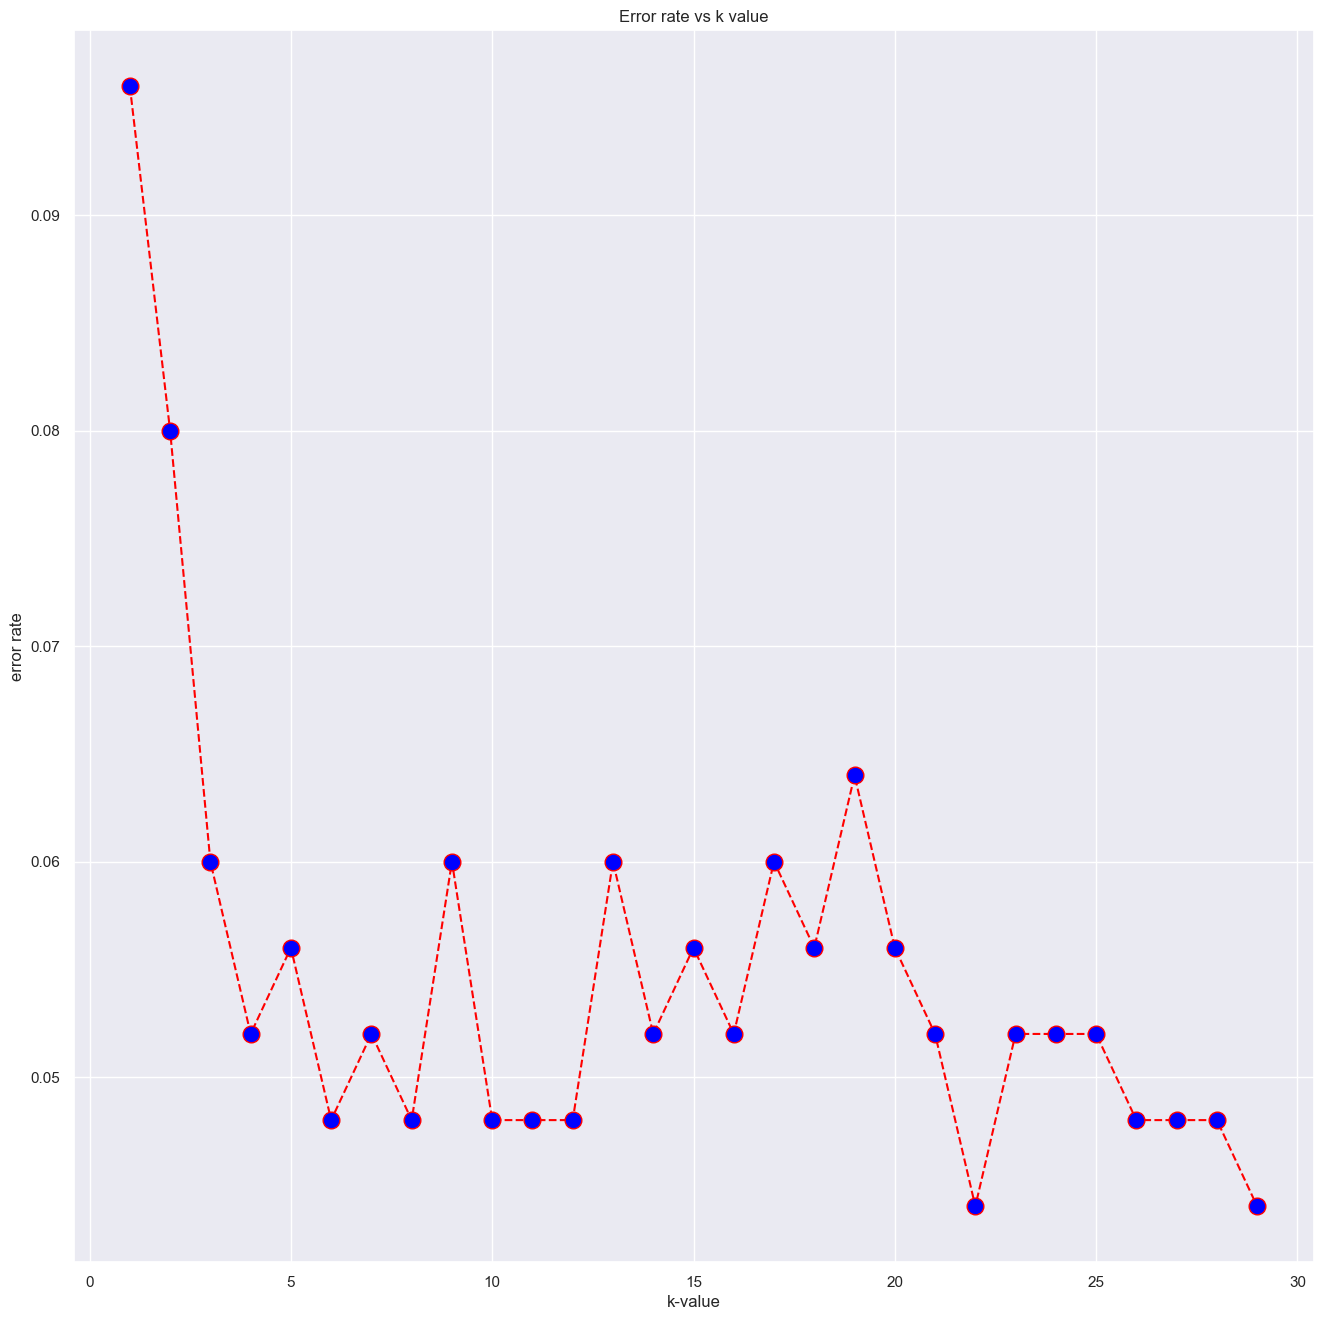

In [16]:
plt.figure(figsize = (16,16))
plt.plot(range(1,30) , error_rate ,color = 'red' , linestyle = 'dashed' ,marker = 'o' , markersize = 12 , markerfacecolor = 'blue')
plt.title('Error rate vs k value')
plt.xlabel('k-value')
plt.ylabel('error rate')
plt.show()

# lower the error rate better the model
# 22 has low error rate

In [17]:
knn = KNeighborsClassifier(n_neighbors = 22)
knn.fit(x_train , y_train)
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [18]:
# evalurate the model
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [19]:
print(confusion_matrix(y_train ,y_pred_train))
print(confusion_matrix(y_test ,y_pred_test))

[[348  27]
 [ 20 355]]
[[115  10]
 [  1 124]]


In [20]:
print(classification_report(y_train ,y_pred_train))
print(classification_report(y_test ,y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       375
           1       0.93      0.95      0.94       375

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       125
           1       0.93      0.99      0.96       125

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [21]:
print(accuracy_score(y_train ,y_pred_train))
print(accuracy_score(y_test ,y_pred_test))

0.9373333333333334
0.956


# cross validation

In [22]:
from sklearn.model_selection import cross_val_score


In [23]:
training_accuracy = cross_val_score(knn , x_train ,y_train , cv = 10)
testing_accuracy = cross_val_score(knn , x_test ,y_test , cv = 10)

In [24]:
print(training_accuracy)
print(training_accuracy.mean())
print(training_accuracy.max())

[0.97333333 0.94666667 0.93333333 0.93333333 0.82666667 0.97333333
 0.94666667 0.90666667 0.93333333 0.93333333]
0.9306666666666666
0.9733333333333334


In [26]:
print(testing_accuracy)
print(testing_accuracy.mean())
print(testing_accuracy.max())

[0.96 1.   1.   0.96 0.96 0.96 0.96 0.96 0.88 0.96]
0.9600000000000002
1.0


In [27]:
pwd

'C:\\Users\\Mohan\\Python_Practice\\stats and ml'

In [1]:
from sklearn.ensemble import adaboost, GDBoosting

ImportError: cannot import name 'adaboost' from 'sklearn.ensemble' (C:\Users\Mohan\anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)

In [2]:
np.fillna()

NameError: name 'np' is not defined

In [ ]:
np.fillna()